<a href="https://colab.research.google.com/github/AkkiAT/AT/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_train = pd.read_csv('/content/Train.csv')
df_test = pd.read_csv('/content/Test.csv')

In [63]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [67]:
!pip show klib

Name: klib
Version: 1.1.2
Summary: Customized data preprocessing functions for frequent tasks.
Home-page: 
Author: Andreas Kanz
Author-email: andreas@akanz.de
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: Jinja2, matplotlib, numpy, pandas, plotly, scipy, screeninfo, seaborn
Required-by: 


In [68]:
!pip install klib

In [69]:
import klib

In [70]:
dir(klib)

['__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'cat_plot',
 'clean',
 'clean_column_names',
 'convert_datatypes',
 'corr_interactive_plot',
 'corr_mat',
 'corr_plot',
 'data_cleaning',
 'describe',
 'dist_plot',
 'drop_missing',
 'missingval_plot',
 'mv_col_handling',
 'pool_duplicate_subsets',
 'utils']

In [71]:
klib.mv_col_handling(df_train)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Label Encoding**

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
df_train = df_train.apply(le.fit_transform)

In [74]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Identifier']= le.fit_transform(df_train['Outlet_Identifier'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [75]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,375,1,715,10,2901,9,4,1,0,1,1639
3,1121,392,2,0,6,4227,0,3,3,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,1,3912,13,4955,1,1,0,2,1,2047
8519,897,233,2,3278,0,2023,7,5,3,1,1,516
8520,1357,299,1,2302,8,1263,6,6,2,1,1,1018
8521,681,149,2,7175,13,1857,3,8,1,2,2,1466


In [76]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,284,1,664,4,5592,9,4,1,0,1,2540
1,8,57,2,880,14,473,3,8,1,2,2,422
2,662,375,1,715,10,2901,9,4,1,0,1,1639
3,1121,392,2,0,6,4227,0,3,3,2,0,670
4,1297,265,1,0,9,627,1,1,0,2,1,865


In [77]:
df_train = pd.get_dummies(df_train,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [78]:
df_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,284,664,5592,4,2540,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
1,8,57,880,473,8,422,False,False,True,False,...,True,False,False,False,False,True,False,False,True,False
2,662,375,715,2901,4,1639,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
3,1121,392,0,4227,3,670,False,False,True,False,...,False,False,True,False,False,True,True,False,False,False
4,1297,265,0,627,1,865,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,3912,4955,1,2047,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
8519,897,233,3278,2023,5,516,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
8520,1357,299,2302,1263,6,1018,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False
8521,681,149,7175,1857,8,1466,False,False,True,False,...,True,False,False,False,False,True,False,False,True,False


In [79]:
X = df_train.drop('Item_Outlet_Sales',axis=1)

In [80]:
Y = df_train['Item_Outlet_Sales']

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [82]:
X_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,...,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
3288,1377,415,1966,195,0,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
2206,861,323,4985,4539,5,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False
170,1401,341,908,3676,6,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
6526,1001,415,3968,5368,0,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
135,1428,151,5021,2300,2,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1172,286,7851,2840,3,False,False,True,False,False,...,False,False,True,False,False,True,True,False,False,False
5191,263,356,6493,1015,7,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
5390,1464,376,856,5369,5,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
860,609,404,3739,2364,7,False,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False


# **Standarization**

In [83]:
X.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,313.635105,3709.198639,2941.096562,3.790684
std,449.222377,104.998618,2396.606857,1675.483234,2.730322
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,395.500000,285.000000,1595.500000,1535.500000,1.000000
50%,783.000000,341.000000,3708.000000,2949.000000,4.000000
75%,1167.000000,395.000000,5789.500000,4351.500000,6.000000
max,1558.000000,415.000000,7879.000000,5937.000000,8.000000


In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [85]:
X_train_std=sc.fit_transform(X_train)

In [86]:
X_test_std=sc.transform(X_test)

In [87]:
X_train_std

array([[ 1.31999532,  0.96067232, -0.72492298, ..., -1.37359175,
        -0.35121553,  2.80964072],
       [ 0.17315554,  0.07272194,  0.54077047, ...,  0.72801835,
        -0.35121553, -0.35591739],
       [ 1.3733367 ,  0.24645136, -1.16848166, ...,  0.72801835,
        -0.35121553, -0.35591739],
       ...,
       [ 1.51335784,  0.58425857, -1.19028228, ...,  0.72801835,
        -0.35121553, -0.35591739],
       [-0.386929  ,  0.85450434,  0.01839418, ...,  0.72801835,
        -0.35121553, -0.35591739],
       [ 1.40222996,  0.46843896, -1.24184912, ...,  0.72801835,
        -0.35121553, -0.35591739]])

In [88]:
X_test_std

array([[-0.65808104,  0.22714809, -0.91651685, ...,  0.72801835,
        -0.35121553, -0.35591739],
       [ 1.35333369, -1.07582258,  0.41751315, ...,  0.72801835,
        -0.35121553, -0.35591739],
       [-1.19816257,  0.24645136, -0.37150145, ...,  0.72801835,
        -0.35121553, -0.35591739],
       ...,
       [-0.52250502, -2.58147758, -0.38827116, ...,  0.72801835,
        -0.35121553, -0.35591739],
       [ 0.38429852, -2.95789133, -0.20799683, ...,  0.72801835,
        -0.35121553, -0.35591739],
       [-0.67586151,  0.19819319,  1.37506328, ..., -1.37359175,
         2.84725448, -0.35591739]])

In [89]:
import joblib

# **Model Building**

In [90]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [91]:
X_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,...,Outlet_Size_1,Outlet_Size_2,Outlet_Size_3,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
7503,487,339,1509,1114,1,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2957,1392,204,4691,292,2,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
7031,244,341,2809,275,4,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
1084,14,415,3098,3933,0,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
856,890,295,361,4747,6,False,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


In [98]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [106]:
Y_test = y_test

In [108]:
y_train = y_train

In [109]:
X_test = X_test

In [110]:
X_train = X_train

In [120]:
y_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [126]:
X_train_std = X_train_std[:9]

In [127]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [129]:
# Fit the model with training data
lr.fit(X_train_std, y_train)

# Predict on test data
Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [130]:
Y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [131]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_squared_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


-252.9267738973125
211948383.08319783
14558.447138455318


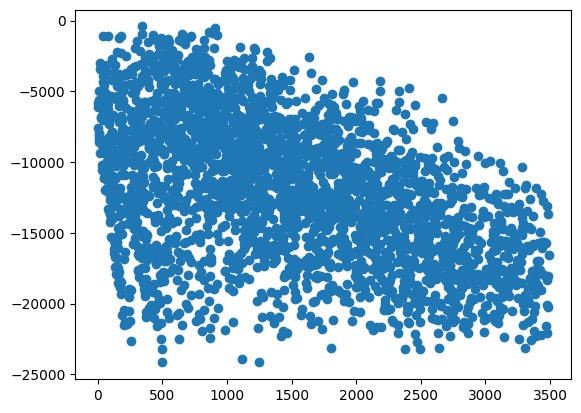

In [133]:
plt.scatter(Y_test,Y_pred_lr)
plt.show()